# Daten Visualisieung

## 1 - Pandas

In [1]:
# aber wir werden die generelle Methode nutzen
import pickle

with open('df.pkl', 'rb') as file:
    df = pickle.load(file)

/tmp/ipykernel_7928/344725740.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  df = pickle.load(file)


In [2]:
df.head(10)

,country,is_urban,age,gender,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
row_id,,,,,,,,,,,,,,,,,,,,,
0.0,C,False,18,female,True,P,Other,1.0,True,True,...,True,True,False,False,False,False,1,0,1,0.515
1.0,C,True,30,female,True,P,Other,1.0,True,True,...,True,True,False,False,False,False,1,0,0,0.981
2.0,A,False,20,female,True,Q,Spouse,1.0,True,True,...,False,False,False,False,False,False,0,0,0,0.982
3.0,A,False,61,male,True,Q,Head,0.0,False,True,...,False,False,False,False,False,False,0,0,0,0.879
4.0,D,False,26,female,True,X,Spouse,1.0,True,False,...,False,False,False,False,False,False,1,0,3,0.796
5.0,A,True,36,female,True,Q,Spouse,1.0,False,True,...,True,False,False,True,False,False,1,0,0,0.915
6.0,C,False,35,male,True,P,Head,1.0,False,True,...,True,True,False,False,False,False,1,0,1,0.447
7.0,D,True,33,female,True,Q,Spouse,1.0,True,True,...,True,False,False,False,False,False,0,0,0,0.612
8.0,G,False,42,male,False,X,Head,2.0,True,True,...,True,True,True,True,False,False,3,0,7,0.404


<Axes: xlabel='row_id'>

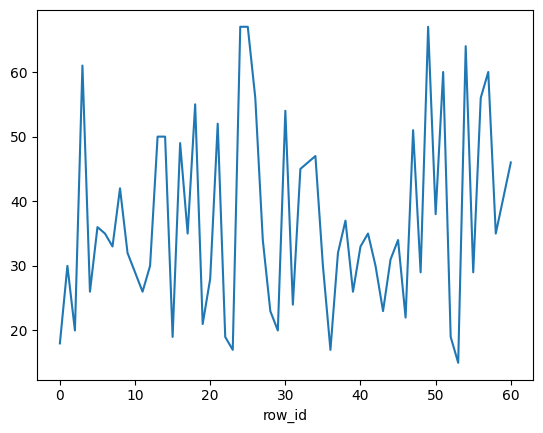

In [3]:
df['age'].loc[:60].plot()

<Axes: >

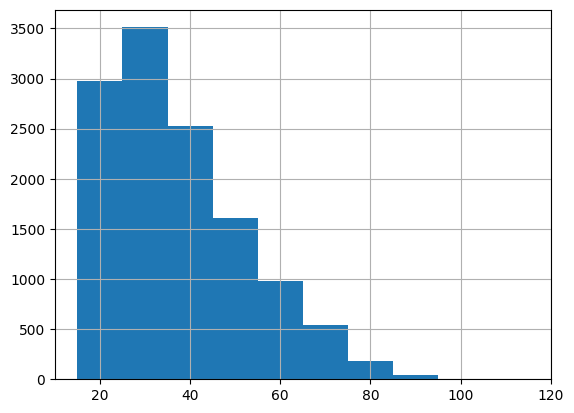

In [4]:
df['age'].hist()

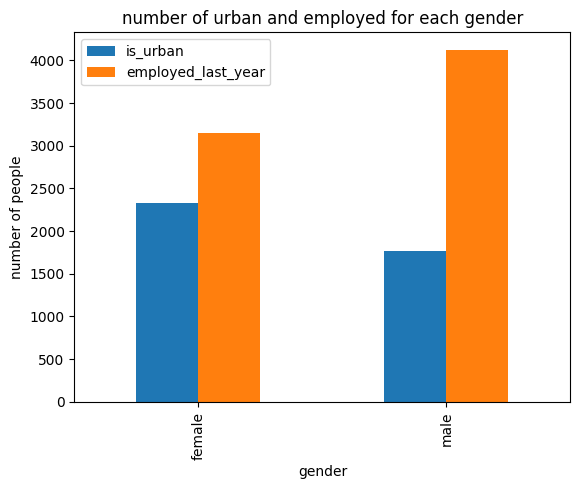

In [5]:
df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().plot.bar(title = 'number of urban and employed for each gender', ylabel = 'number of people');

## 2 - Matplotlib

Pandas eignet sich gut für schnelle, standardisierte Visualisierungen. <br>
Sobald wir etwas Komplexeres brauchen, sind wir mit Matplotlib, dem Paket, das auch Pandas verwendet, besser dran. Damit sind wir viel flexibler und können das Bildmaterial leicht anpassen, Abbildungen nebeneinander stellen, Anmerkungen machen usw...

In [6]:
import matplotlib.pyplot as plt
import numpy as np

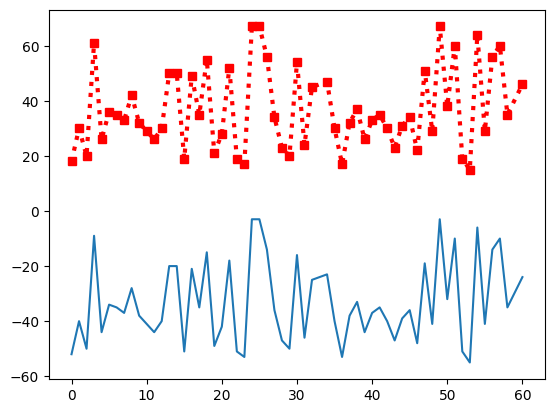

In [7]:
plt.plot(df['age'].loc[:60]-70)
plt.plot(df['age'].loc[:60], color="r", linestyle=':', marker='s', linewidth=3)

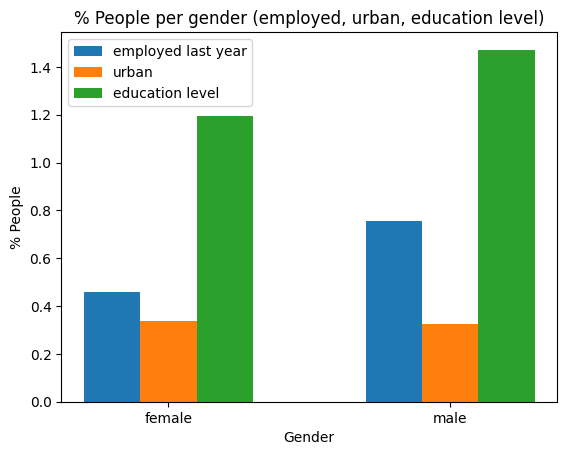

In [8]:
X_axis = np.arange(len(df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index)) 

plt.bar(X_axis-0.2, df.groupby('gender')['employed_last_year'].mean(), 0.2, label='employed last year');
plt.bar(X_axis, df.groupby('gender')['is_urban'].mean(), 0.2, label='urban');
plt.bar(X_axis+0.2, df.groupby('gender')['education_level'].mean(), 0.2, label='education level');

plt.xticks(X_axis, df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index) 
plt.xlabel("Gender") 
plt.ylabel("% People") 
plt.legend()
plt.title("% People per gender (employed, urban, education level)") ;


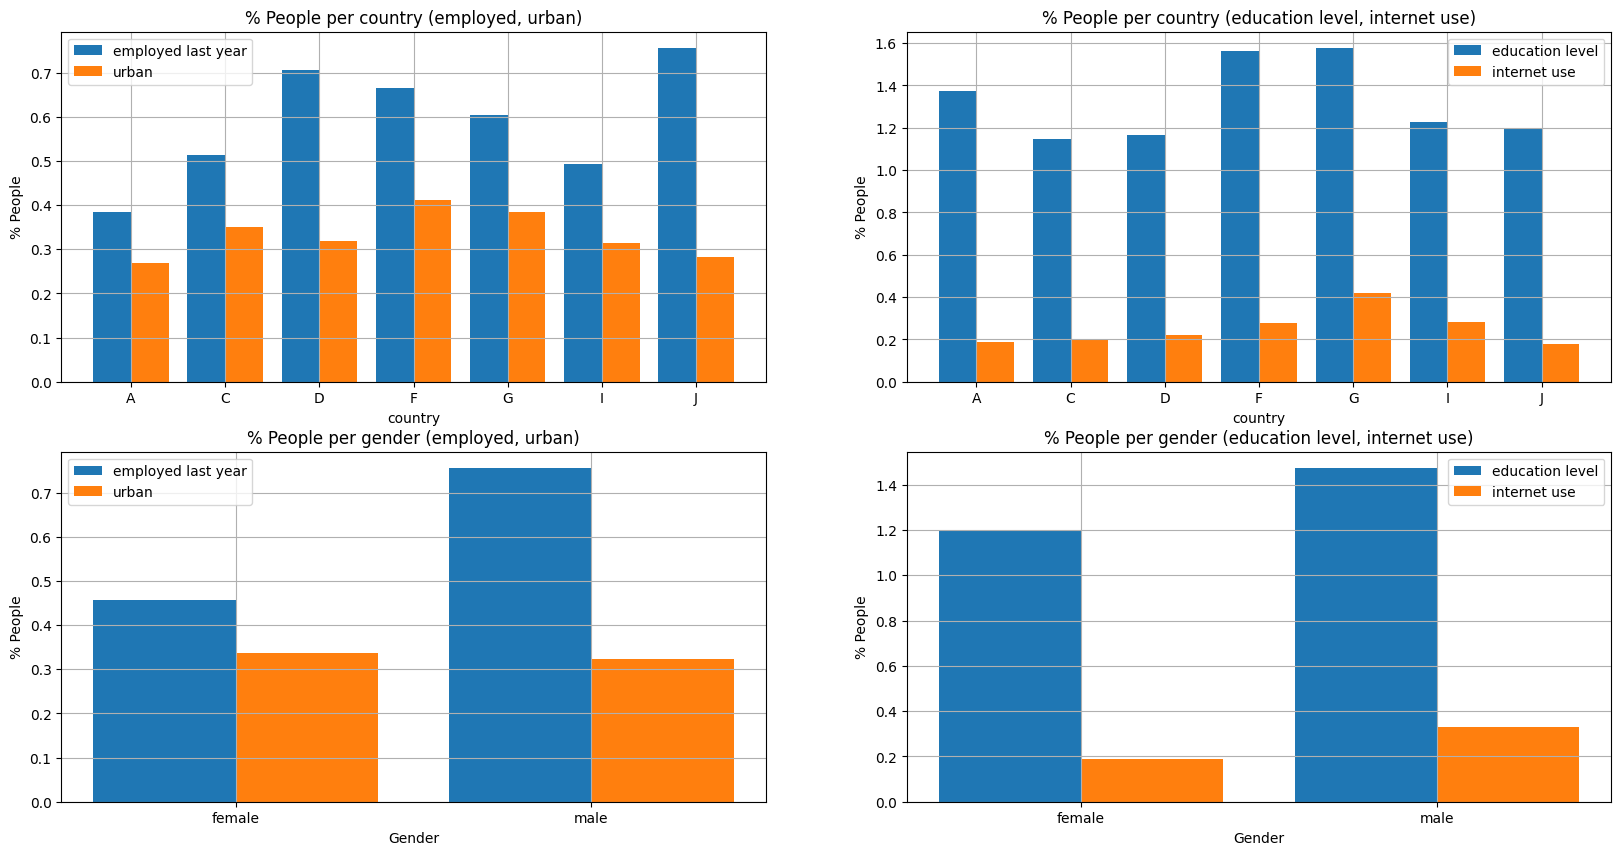

In [9]:
fig, axs = plt.subplots(2,2,figsize=(20,10))

X_axis = np.arange(len(df.groupby('country')[['is_urban', 	'employed_last_year']].sum().index)) 

with plt.style.context('grayscale'):

    axs[0][0].bar(X_axis-0.2, df.groupby('country')['employed_last_year'].mean(), 0.4, label='employed last year');
    axs[0][0].bar(X_axis+0.2, df.groupby('country')['is_urban'].mean(), 0.4, label='urban');
    
    axs[0][0].set_xticks(X_axis, df.groupby('country')[['is_urban', 	'employed_last_year']].sum().index) 
    axs[0][0].set_xlabel("country") 
    axs[0][0].set_ylabel("% People") 
    axs[0][0].legend()
    axs[0][0].grid()
    axs[0][0].set_title("% People per country (employed, urban)") ;
    
    
    axs[0][1].bar(X_axis-0.2, df.groupby('country')['education_level'].mean(), 0.4, label='education level');
    axs[0][1].bar(X_axis+0.2, df.groupby('country')['can_use_internet'].mean(), 0.4, label='internet use');
    
    axs[0][1].set_xticks(X_axis, df.groupby('country')[['is_urban', 	'employed_last_year']].sum().index) 
    axs[0][1].set_xlabel("country") 
    axs[0][1].set_ylabel("% People") 
    axs[0][1].legend()
    axs[0][1].grid()
    axs[0][1].set_title("% People per country (education level, internet use)") ;
    
    
    X_axis = np.arange(len(df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index)) 
    
    axs[1][0].bar(X_axis-0.2, df.groupby('gender')['employed_last_year'].mean(), 0.4, label='employed last year');
    axs[1][0].bar(X_axis+0.2, df.groupby('gender')['is_urban'].mean(), 0.4, label='urban');
    
    axs[1][0].set_xticks(X_axis, df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index) 
    axs[1][0].set_xlabel("Gender") 
    axs[1][0].set_ylabel("% People") 
    axs[1][0].legend()
    axs[1][0].grid()
    axs[1][0].set_title("% People per gender (employed, urban)") ;
    
    
    axs[1][1].bar(X_axis-0.2, df.groupby('gender')['education_level'].mean(), 0.4, label='education level');
    axs[1][1].bar(X_axis+0.2, df.groupby('gender')['can_use_internet'].mean(), 0.4, label='internet use');
    
    axs[1][1].set_xticks(X_axis, df.groupby('gender')[['is_urban', 	'employed_last_year']].sum().index) 
    axs[1][1].set_xlabel("Gender") 
    axs[1][1].set_ylabel("% People") 
    axs[1][1].legend()
    axs[1][1].grid()
    axs[1][1].set_title("% People per gender (education level, internet use)") ;
    
    plt.savefig('% people breakdowns.jpg')

## 3 - Seaborn

In [10]:
import seaborn as sns

<Axes: xlabel='poverty_probability', ylabel='Count'>

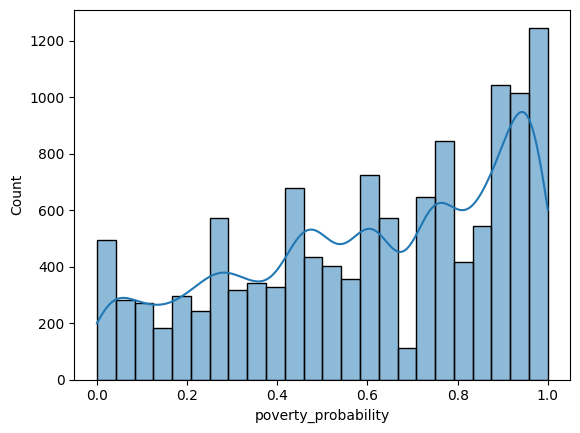

In [11]:
sns.histplot(df['poverty_probability'], kde=True);

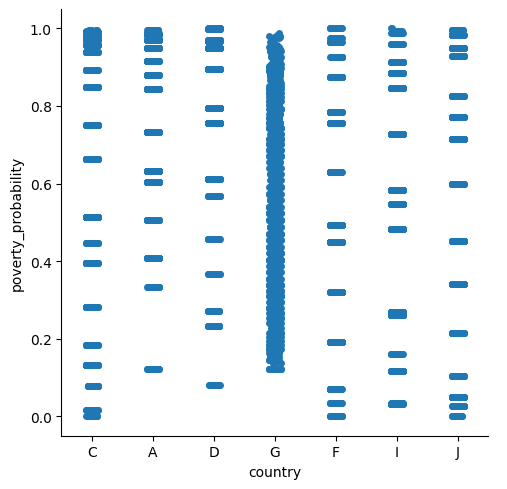

In [12]:
sns.catplot(x ='country' , y='poverty_probability' , data=df);

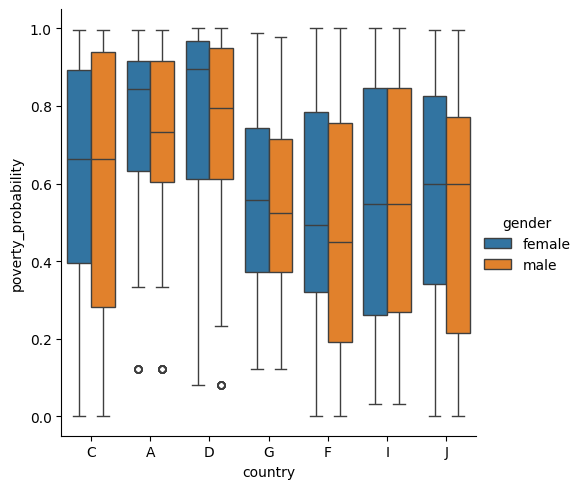

In [15]:
sns.catplot(x ='country' , y='poverty_probability' , data=df, kind="box", hue='gender');

<Axes: xlabel='education_level', ylabel='poverty_probability'>

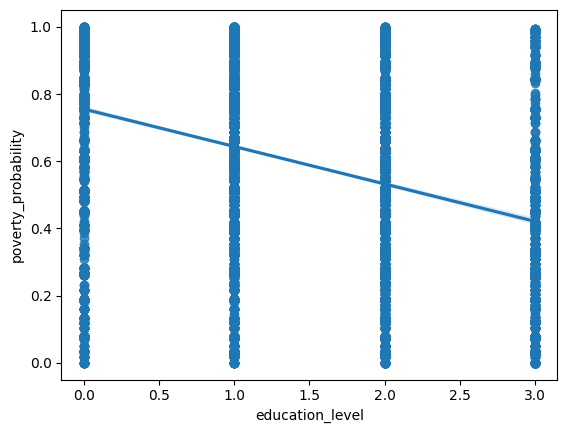

In [16]:
sns.regplot(x='education_level' , y='poverty_probability', data=df);

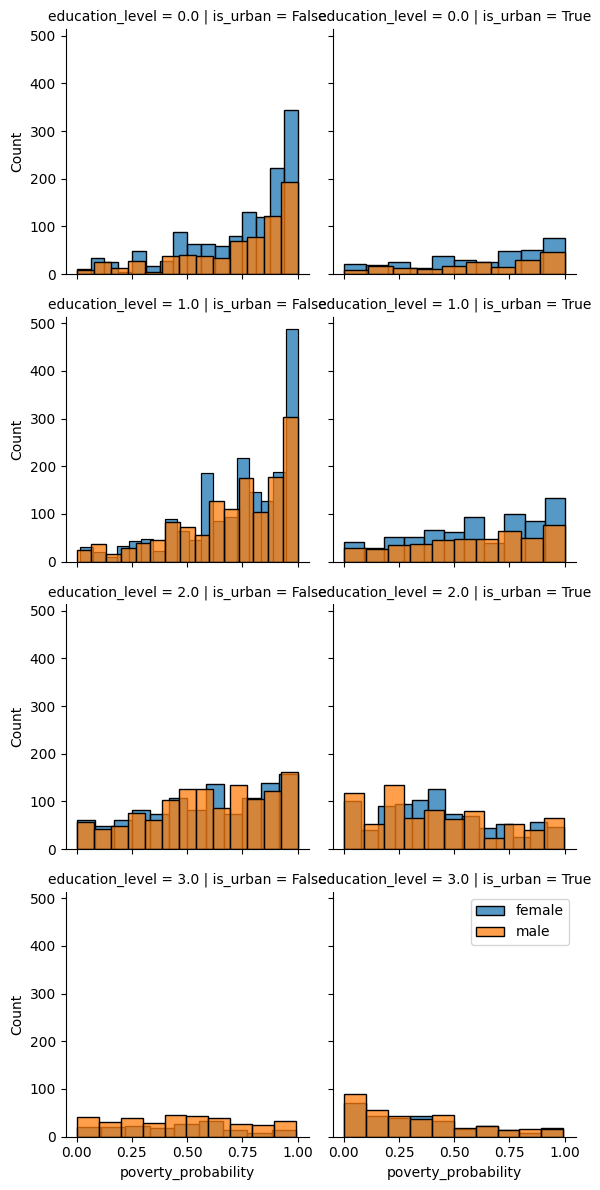

In [23]:
# Create a grid
g = sns.FacetGrid(df, col="is_urban", row="education_level", hue="gender") 

# Plot a graph in each grid element
g.map(sns.histplot, "poverty_probability");
plt.legend();

/tmp/ipykernel_7928/92703392.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  sizes=(10, 50), data=df[:1000]);


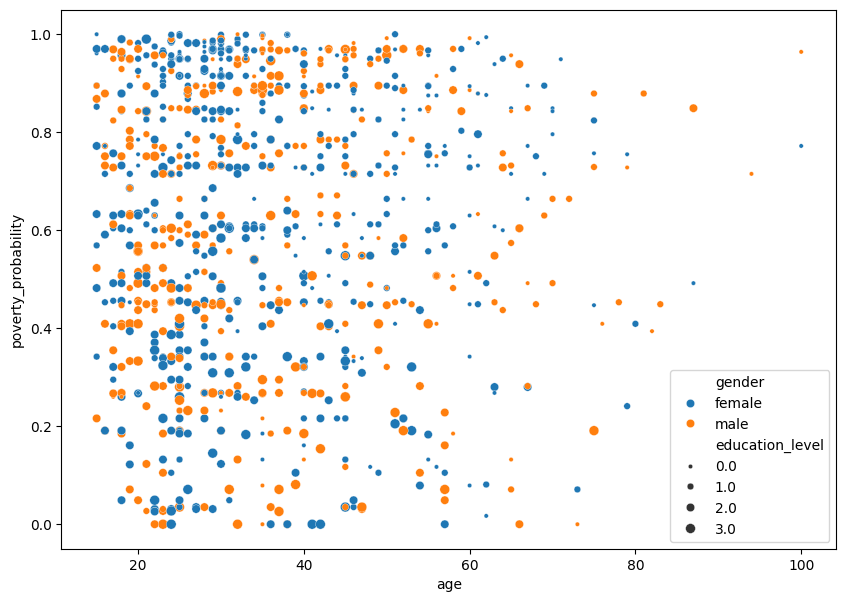

In [54]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="age", y="poverty_probability", hue='gender', size="education_level",
                # palette=sns.color_palette(["#2ecc71", "#e74c3c"]),
                sizes=(10, 50), data=df[:1000]);

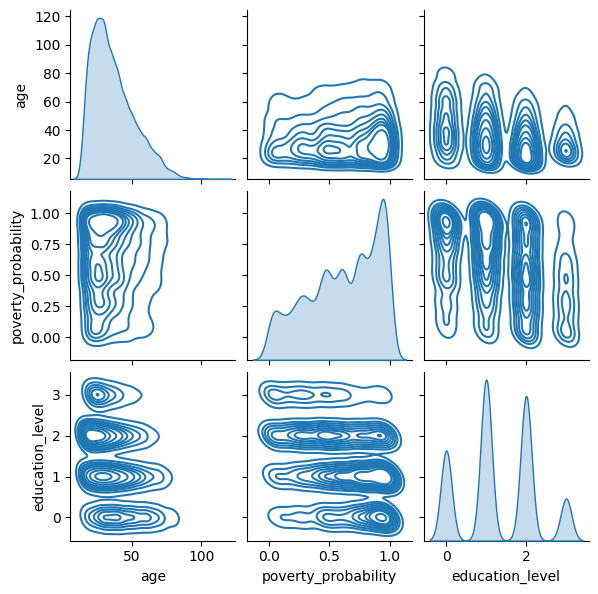

In [52]:
sns.pairplot(data = df[["age", "poverty_probability",  "education_level"]], height=2, kind='kde'); # , hue='gender'